# Hypothesis Testing 
Purpose of Hypothesis testing is to understand wheter there is relationship between two variables or not

### Con vs Con - Correlation

In [1]:
import pandas as pd
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

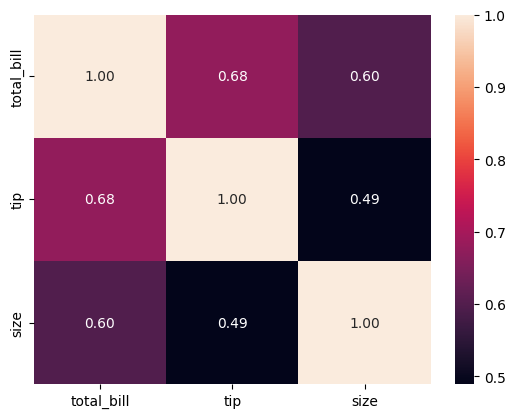

In [4]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

### Cat vs Con (ANOVA) output p_value

## is there any relationship between day and total bill

In [6]:
from statsmodels.formula.api import ols
model = ols("total_bill ~ C(day)", df).fit()

In [7]:
from statsmodels.stats.anova import anova_lm 
Q = anova_lm(model)
Q

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,643.941362,214.647121,2.767479,0.042454
Residual,240.0,18614.522721,77.560511,NaN,NaN


In [9]:
p_value1 = Q.iloc[0, -1]
p_value1

0.04245383328951916

In [10]:
conf_level1 = 1 - p_value1
conf_level1

0.9575461667104809

### if p_value < 0.05 then two features are dependent else two features are not dependent

### Becaues pvalue less than 0.05 for above day and total bill are dependent on each other

In [11]:
def ANOVA(df, cat_col, con_col):
    # Create a model
    model = ols(f"{con_col} ~ C({cat_col})", df).fit()
    # Perform anova
    Q = anova_lm(model)
    # Get the p_value
    p = Q.iloc[0, -1]
    return p

In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [15]:
p2 = ANOVA(df, 'day', 'tip')
p2

0.17358855530405093

### In above case pvalue is more than 0.05 hence tip and day are NOT Dependent on each other

In [16]:
if p2<=0.05:
    print('Given variables are DEPENDENT on each other')
else:
    print('Given variables are NOT Dependent on each other')

Given variables are NOT Dependent on each other


In [17]:
ANOVA(df, 'time', 'total_bill')

0.004104621407595752

In [18]:
ANOVA(df, 'time', 'tip')

0.057801534751716156

### Cat vs Cat - Chisquare test

In [19]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [20]:
ctab = pd.crosstab(df['day'], df['smoker'])
ctab

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


In [21]:
from scipy.stats import chi2_contingency
chi = chi2_contingency(ctab)
chi

Chi2ContingencyResult(statistic=25.787216672396262, pvalue=1.0567572499836523e-05, dof=3, expected_freq=array([[11.75819672,  7.24180328],
       [53.84016393, 33.15983607],
       [47.03278689, 28.96721311],
       [38.36885246, 23.63114754]]))

In [23]:
chi[1]

1.0567572499836523e-05

### Above p_value is less than 0.05 hence day and smoker are dependent on each other

In [26]:
def chi_sq(df, cat_col1, cat_col2):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    chi = chi2_contingency(ctab)
    p = chi[1]
    return p

In [27]:
chi_sq(df, 'smoker', 'time')

0.4771485672079724

### P value above is more than 0.05 hence smoker and time are independent of each other